<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/HW6/KR_HW6_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB good - great as usual!</font>

In [ ]:
a!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Synthetic data

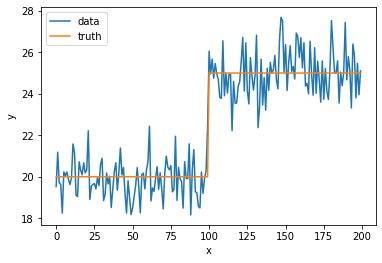

In [ ]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

**Fig. 1.** Synthetic time series generated by two Gaussian stationary processes. On x axis, there are 200 time points. On the y axis, the random value at particular time point (or random variation around the mean). The blue line connects actual data points, whereas the orange line - true mean of the time series (for first part it is 20, for the second - 25). Based on the spike in mean, we could see a clear point of change at the time point 100.

## Single POC - difference of means

In [ ]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))

poc: 100.00, mean before: 19.89, mean after: 25.02


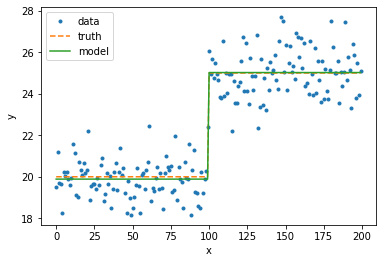

In [ ]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Fig. 2.** Synthetic time series generated by two Gaussian stationary processes. On x axis, there are 200 time points. On the y axis, the random value at particular time point. The blue dots correspond to actual data points. The orange dashed line stands for the true mean based on data. In the solid green line, there is a result of our function calculating single POC by maximazing the difference in means before and after POC. Based on the graph, we could see that our results correspond to data mean results.    

# Single POC - MSE

In [ ]:
def mse(y):
  """calculates the MSE of a vector
    y: vector of endogenouos variables
    
    """
  N = len(y)
  sq_errors = []
  f = np.nanmean
  for i in range(0, N):
    sq_errors.append((y[i] - f(y[i:]))**2)
  mse = sum(sq_errors)/N
  return mse

def poc_mse(y):
  """calculates the POC by minimizing the squeare error
    y: vector of endogenouos variables
    
    """
  N = len(y)
  f = np.nanmean
  mse_all = mse(y)
  poc, before, after = 0, np.nan, np.nan  
  for i in range(1, N):
    mse_before = mse(y[:i])
    mse_after = mse(y[i:])
    mse_sum = mse_before + mse_after
    if mse_all > mse_sum:
      mse_all = mse_sum
      poc = i
      before, after = f(y[:i]), f(y[i:])
  return poc, before, after   

In [ ]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 19.89, mean after: 25.02


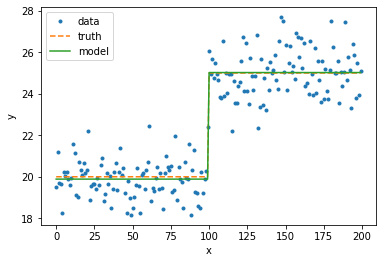

In [ ]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Fig. 3.** Synthetic time series generated by two Gaussian stationary processes. The blue dots correspond to actual data points. The orange dashed line stands for the true mean based on data. In the solid green line, there is a result of our function calculating single POC by minimizing the squared error. Based on the graph, we could see that our results correspond to data mean results. Here, the results also correspond to the results of maxdiff function, which calculated POC by maximazing difference in means. 

## Single POC - diff of variance

In [ ]:
mu1 = 20
s1, s2 = 1, 4 #in the instruction it says variance = 4, but here stands sd = 4. if i understand it correctly
ys = np.concatenate([np.random.randn(100) + mu1 , np.random.randn(100) * s2 + mu1])

In [ ]:
def maxdiff(y, sigma):
  """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
  """
  N = len(y)
  f = np.nanmean
  poc, diff, var, before, after = 0, 0, 0, np.nan, np.nan
  for i in range(1, N):
    if sigma is False:
      diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
      if diff < diff_here:
        diff = diff_here
        poc = i
        before, after = f(ym[:i]), f(ym[i:])
    else:
      var_before = np.var(y[:i])
      var_after = np.var(y[i:])
      var_diff = abs(var_before - var_after)
      if var < var_diff:
        var = var_diff
        poc = i
        before, after = np.std(y[:i]), np.std(y[i:])
  return(poc, before, after)

In [ ]:
print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))

poc: 100.00, standard deviation before: 0.92, standard deviation after: 4.11


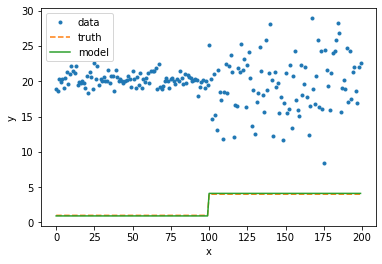

In [ ]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [s1] * 100 + [s2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Fig. 4.** Synthetic time series generated by two Gaussian stationary processes. The blue dots correspond to actual data points. The orange dashed line stands for the true standard deviation based on data. In the solid green line, there is a result of our function calculating single POC by maximizing the variance before and after the POC. Based on the graph, we could see that our results correspond to data std results (however, it might not always be the case). According to this algorithm, the point of change is also at time point 100.  

<font color="red"> FBB good</font>



## Find POC with rupture python package

Ym time series

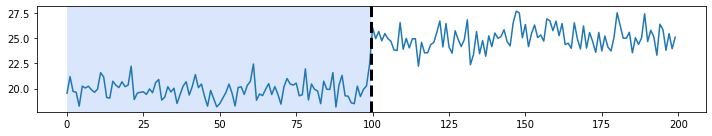

In [ ]:
# detection 
algo = rpt.Pelt(model='rbf').fit(ym)
result = algo.predict(pen=3)

# display
rpt.display(ym, [100], result)
pl.show()

**Fig. 5.** Detection of the POC using Pelt search model from rupture package. The solid blue line is **ym** time series. The dashed dark line corresponds to the POC. The region prior POC coloured in blue.

Ys time series

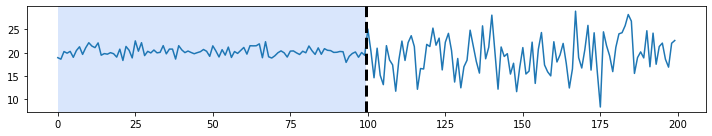

In [ ]:
# detection
algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=3)

# display
rpt.display(ys, [100], result)
pl.show()

**Fig. 6.** Detection of the POC using Pelt search model from rupture package. The solid blue line is **ys** time series. The dashed dark line corresponds to the POC. The region prior POC coloured in blue.

Pelt search method relies on a pruning rule allowing for the reduced computational cost. There are different cost functions that could be used. Interestingly, for the firt time series, l2 cost function results in more separated chuncks of time series, whereas l1 and rbf - not. For the second time series, only rbf results in one POC. So, I chose rbf cost function in this case, which detects changes in the mean of the embedded signal. As the penalty value, as far as I saw in the articles, people either choose the best out of the tested subset, or use BIC. As a rule of thumb, the more noise, samples or dimensions, the larger this parameter people set to be.

<font color="red"> FBB very good</font>

# The data from LANL earthquake prediction

In [ ]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv')
eq1.describe()

,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


In [ ]:
#let's get rid of unnamed column
eq1 = eq1[['acoustic_data', 'time_to_failure']]

In [ ]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


**Dynp search method**

Dynp is a method that takes as input the number of pocs and has computational complexity O(kN^2). It finds the (exact) minimum of the sum of costs by computing the cost of all subsequences of a given signal. I've chosen normal cost function as it's robust to strongly dependent processes.

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


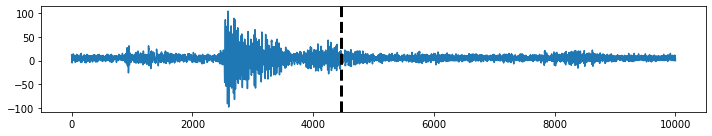

In [ ]:
#Dynp for 10 000 rows and k = 1
algo1 = rpt.Dynp(model='normal').fit(eq1[:10000])
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
pl.show();

**Fig. 7.** Seismic signal (in blue). On the x axis - time points, on y axis - the amplitude of seismic signal. Here, the Dynp search method was used on a subset of 10 000 data points aiming at finding one POC which is between 4000 and 5000.

<font color="red"> FBB good!</font>

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


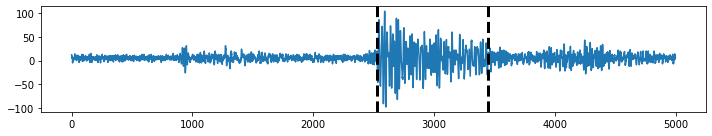

In [ ]:
#Dynp for 5 000 rows and k = 2
algo2 = rpt.Dynp(model='normal').fit(eq1[:5000])
result = algo2.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:5000], [], result)
pl.show();

**Fig. 8.** Seismic signal (in blue). On the x axis - time points, on y axis - the amplitude of seismic signal. Here, the Dynp search method was used on a subset of 5 000 data points aiming at finding two POC. Looks like it makes a good job at identifying POC in th signal, however, there are some others that could've been picked up.

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


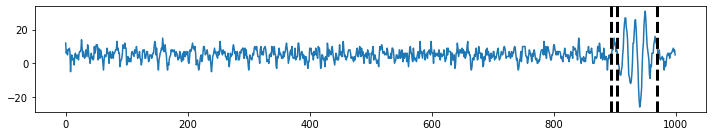

In [ ]:
#Dynp for 1 000 rows and k = 3
algo3 = rpt.Dynp(model='normal').fit(eq1[:1000])
result = algo3.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:1000], [], result)
pl.show()

**Fig. 9.** Seismic signal (in blue). Here, the Dynp search method was used on a subset of 1 000 data points aiming at finding three POC. Here it makes a good job of fonding different patterns of frequency in signal. However, the more POC we're setting to be found, the more computationally expensive the algirithm is. 

<font color="red"> FBB there may be an advantage in this processing choice: there is a point of change **before** the beginning of the large wave pattern (which may be an earthquake signal) so this _may_ help early detection perhaps!</font>

**Dynp search method for 10 000 rows dataset**

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


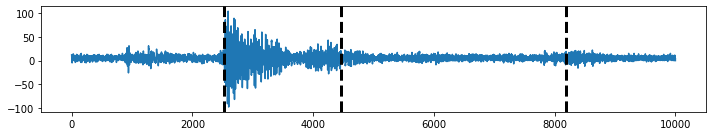

In [ ]:
algo4 = rpt.Dynp(model='normal').fit(eq1[:10000])
result = algo4.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
pl.show();

**Fig. 9.** Seismic signal (in blue). Here, the Dynp search method was used on a subset of 10 000 data points aiming at finding three POC. Based on the graph we could  see that algorithm could've picked up the POC between 2000 and 4000 time points. 

**Bottom-up segmentation search method for 10 000 rows dataset**


This is a method that has computational complexity O(Nlog(N)). It starts with many change points and successively deletes the less significant ones.

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


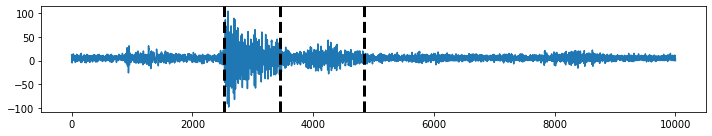

In [ ]:
algo5 = rpt.BottomUp(model='normal').fit(eq1[:10000])
result = algo5.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
pl.show();

**Fig. 10.** Seismic signal (in blue). Here, the Bottom up segmentation search method was used on a subset of 10 000 data points aiming at finding three POC. Based on the graph we could see that algorithm does better job than the Dynp at differetiating change in frequency between 2000 and 4000 time points.

These methods, bottom up and dynp, are computationally expensive and take quite some time to process. Another thing is that they take as an input the number of POC, however, rarely we know beforehand how many there would be. Finally, we assume that there is an abrupt change in signal, however, it could be the case of window of change rather than a particular point that could be chosen differently depending on the algorithm.

<font color="red"> FBB overall very good!</font>